Assignment 2: Gradient Descent
==============================


Microsoft Forms Document: TBD

The loss function is manually defined as $\mathcal J_{\vec w}=w_0^2 + w_1^2 + 20 \sin(w_0) \cos(w_1)$.
The weights $\vec w = (w_0, w_1)^T$ shall be optimized such that the loss function has a minimum.


Task 1: Compute the Gradient
----------------------------

The gradient is defined as the partial derivatives of the loss function with respect to the two variables $w_0$ and $w_1$.
We need to calculate it:

$\frac{\partial J}{\partial w_0 }= 2w_0 + 20 \cos(w_0) \cos(w_1)$

$\frac{\partial J}{\partial w_1 }= 2w_1 - 20 \sin(w_0) \sin(w_1)$

Task 2: Implement the Loss Function
-----------------------------------


In [6]:
import numpy

def loss(w):
  return w[0]**2 + w[1]**2 + 20*numpy.sin(w[0])*numpy.cos(w[1])

Task 3: Implement the Gradient
------------------------------
Remeber that the gradient needs to be computed and returned for both $w_0$ and $w_1$.

In [7]:
def gradient(w):
  grad = np.ndarray(2, dtype = 'float')
  grad[0] = 2*w[0] + 20*np.cos(w[0])*np.cos(w[1])
  grad[1] = 2*w[1] - 20*np.sin(w[0])*np.sin(w[1])
  return grad

Test 1: Test Functions
----------------------
Test the two functions defined in the task above with $\vec w = (0,0)^T$ . What should be the expected outcomes?

In [8]:
w = numpy.zeros(2)
np = numpy

# analytically compute the expected values
expected_loss = 0
expected_gradient = np.array([20,0])

# test loss function
assert abs(loss(w) - expected_loss) < 1e-8
assert numpy.all(numpy.abs(gradient(w) - expected_gradient) < 1e-8)

Gradient descent is an iterative algorithm that requires to define a proper stopping criterion.
There are several possibilities.
Chose at least one.

Task 4: Termination Criterion
-----------------------------

* Fixed number of iterations
* Litte change in loss
* Gradient near 0

Task 5: Implement Gradient Descent
----------------------------------

We want to implement a function that performs gradient descent.
We want this function to be very flexible, hence the functions to compute the gradient and the loss are provided as parameters.

In [9]:
def gradient_descent(w, eta=0.01):
  # copy the weights to not modify the original values
  #copy the weights to not modify the original values
  w_star = w.copy()
  i = 0 #number of iterations counter
  grad = gradient(w_star)

  # perform iterative gradient descent
  while (i < 1000) and (numpy.linalg.norm(grad) >= 1e-4):
    # compute the gradient
    loss1 = loss(w_star)
    grad = gradient(w_star)

    i += 1

    # update the weights
    w_star -= eta*grad
    loss2 = loss(w_star)
    delta_loss = loss2 - loss1

    #linear learning rate scheduler implementation
    if delta_loss < 0:
      eta *= 1.1
    else:
      eta *= 0.5
  return w_star

Task 6: Evaluate Gradient Descent
---------------------------------

We call gradient descent 1000 times with different random values for $\vec w\in[-20,20]^2$ and a learning rate of $\eta=0.01$. Store the resulting weight vectors.

In [10]:
stored_weights = []

for i in range(1000):
  # create random weight vector
  w = np.random.uniform(-20,20,2)
  # call gradient descent
  w_star = gradient_descent(w, eta=0.01)
  # store it in the list
  stored_weights.append(w_star)

Test 2: Check Minima
--------------------

How many minima do you expect for our loss function? Make sure that the number of minima that are reached is not higher than that!

In [11]:
maximum_number_of_minima = 16

# compute the number of reached minima 
a = np.array(stored_weights)
print(np.unique(np.round(a, 2), axis=0))
number_of_reached_minima = np.unique(np.round(a, 1), axis=0).shape[0]

assert number_of_reached_minima <= maximum_number_of_minima

[[-7.07  0.  ]
 [-4.25 -2.82]
 [-4.25  2.82]
 [-1.43  0.  ]
 [-1.4  -5.67]
 [-1.4   5.67]
 [ 1.3  -8.37]
 [ 1.3   8.37]
 [ 1.31 -8.37]
 [ 1.31  8.37]
 [ 1.42 -2.85]
 [ 1.42  2.85]
 [ 4.13 -5.55]
 [ 4.13  5.55]
 [ 4.27 -0.  ]
 [ 6.97 -2.7 ]
 [ 6.97  2.7 ]
 [ 9.68 -0.  ]]


Task 7: Find global minimum
---------------------------
From the 1000 result vectors, select the one with the minimum loss and print both of them.

In [12]:
all_loss = [np.array([loss(w)]) for w in stored_weights]

minimum_loss = np.min(all_loss)
minimum_weights = stored_weights[np.where(all_loss==minimum_loss)[0][0]]

print("The minimum loss value of:", minimum_loss, "was found for minimum", minimum_weights)

The minimum loss value of: -17.757256531474155 was found for minimum [-1.42755178e+00 -1.42459033e-09]


Task 8: Loss Surface Plot
-------------------------

Plot the loss surface and the optimized points into the same 3D plot.
Chose the range for $w_0$ and $w_1$ to be in $[-10,10]$.

When plotting the resulting optimized weights $\vec w=(w_0, w_1)^T$, we need to define the third coordinate. What should this coordinate be?


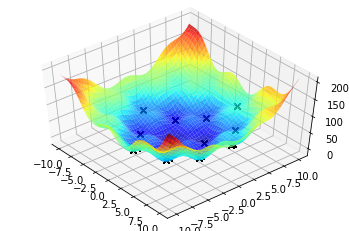

In [14]:
from matplotlib import pyplot

# create 3D axis
figure = pyplot.figure()
axis = figure.add_subplot(111, projection='3d', azim = -40, elev=50)

# define range to plot
w_range = np.linspace(-10, 10, 200)
w0, w1 = numpy.meshgrid(w_range,w_range)

# compute loss for w0 and w1
J = loss([w0,w1])

# plot surface with jet colormap
axis.plot_surface(w0, w1, J, cmap="jet", alpha=0.8)

# plot resulting points in 3D
for w_star in stored_weights:
  # compute the z-position)
  z = loss(w_star)
  # plot as 3D point
  axis.plot([w_star[0]], [w_star[1]], [z], "kx-")